In [1]:
import pandas as pd

In [15]:
jhu_data = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

In [16]:
# Getting only Colorado
co_data = jhu_data[jhu_data['Province_State']=='Colorado']

# Getting rid of stupid FIPS
co_data = co_data[co_data['FIPS']<10000]

In [17]:
print(list(co_data.keys()))

['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/

In [18]:
co_data.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
249,84008001.0,US,USA,840,8001.0,Adams,Colorado,US,39.874321,-104.336258,...,1082,1252,1302,1348,1391,1430,1490,1585,1665,1730
250,84008003.0,US,USA,840,8003.0,Alamosa,Colorado,US,37.572506,-105.788545,...,9,10,10,10,10,10,10,10,10,11
251,84008005.0,US,USA,840,8005.0,Arapahoe,Colorado,US,39.649775,-104.335362,...,1824,2030,2083,2160,2252,2312,2389,2472,2557,2625
252,84008007.0,US,USA,840,8007.0,Archuleta,Colorado,US,37.194742,-107.047687,...,8,8,8,8,8,8,8,8,8,8
253,84008009.0,US,USA,840,8009.0,Baca,Colorado,US,37.319409,-102.560322,...,10,10,10,10,10,10,10,10,10,10


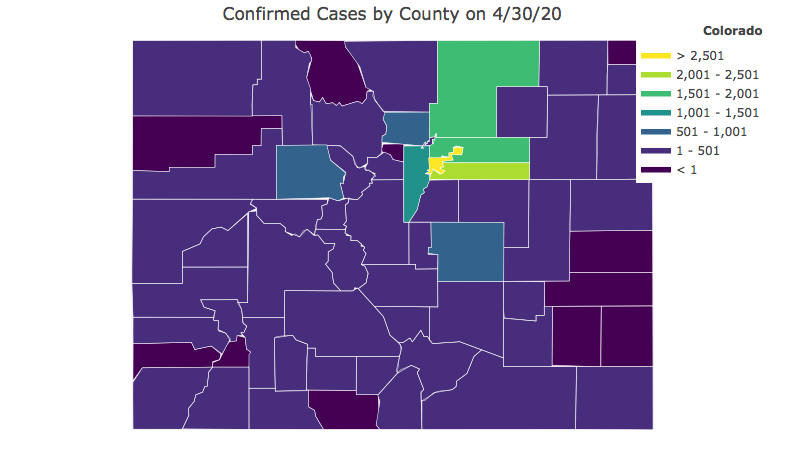

In [36]:
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

date = '4/30/20'
fips = co_data['FIPS']
values = co_data[date]

fig = ff.create_choropleth(fips=fips, values=values)
colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=fips, values = values, scope=['CO'],
    binning_endpoints = list(range(min(values+1), max(values), round((max(values)-min(values))/6))), 
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title=f'Colorado', title= f'Confirmed Cases by County on {date}',
    show_hover=True, centroid_marker={'opacity': 0}
)

fig.layout.template = None
fig.show()

#plt.savefig('test.jpg',format='jpg')

In [14]:
co_data[co_data['5/1/20']==163]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
265,84008031.0,US,USA,840,8031.0,Denver,Colorado,US,39.760183,-104.872569,...,98,128,132,132,135,145,150,154,163,164


In [38]:
# Build figure object (in case fig is a dictionary)
fig = go.Figure(fig)

# Get hover trace
hover_scatter = [scatt for scatt in fig.data if scatt.mode == 'markers'][0]

# Update text to include only county (Not state, FIPS, ec.)
import re
def extract_county(text_val):
    return re.sub(r'County: (.*?)<br>.*', r'\1', text_val)

hover_scatter.text = [extract_county(text_val) for text_val in hover_scatter.text]

# Show text
hover_scatter.mode = 'markers+text'

# Set font properties
hover_scatter.textfont.size = 8

Signature:
ff.create_choropleth(
    fips,
    values,
    scope=['usa'],
    binning_endpoints=None,
    colorscale=None,
    order=None,
    simplify_county=0.02,
    simplify_state=0.02,
    asp=None,
    show_hover=True,
    show_state_data=True,
    state_outline=None,
    county_outline=None,
    centroid_marker=None,
    round_legend_values=False,
    exponent_format=False,
    legend_title='',
    **layout_options,
)
Docstring:
Returns figure for county choropleth. Uses data from package_data.

:param (list) fips: list of FIPS values which correspond to the con
    catination of state and county ids. An example is '01001'.
:param (list) values: list of numbers/strings which correspond to the
    fips list. These are the values that will determine how the counties
    are colored.
:param (list) scope: list of states and/or states abbreviations. Fits
    all states in the camera tightly. Selecting ['usa'] is the equivalent
    of appending all 50 states into your scope list. Sele